In [1]:
import pandas as pd
import numpy as np
import csv

import torch
import matplot

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import mplfinance as mpf

In [2]:
from IPython.core.display import HTML
from IPython.core.display import display
display(HTML("<style>.container { width:80% !important; }</style>"))

<ipython-input-2-cdfc01ca41ac>:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [3]:
#data = pd.read_csv('tp_gpu_workload_only_log.csv')
data = pd.read_csv('violet_gpu_allocation_data.csv')
log = pd.read_csv('violet_gpu_allocation_data.csv')

data['start'] = pd.to_datetime(data['start'], utc=True)
data['finish'] = pd.to_datetime(data['finish'], utc=True)
data['time_diff'] = data['finish'] - data['start']
data

,node,gpu_number,GPU,gpu_utilization,pod_name,pod_type,project,namespace,user_team,start,finish,pod_type_color,project_color,time_diff
0,gpu-server01,0,gpu-server01:0,68.499391,violet-run-pipeline-gpu-kb27t-3379495359,task,PROJECT_17,ns-16904374776309414,NaN,2023-11-09 07:30:00+00:00,2023-11-12 16:45:00+00:00,red,"(0.29545293465748007, 0.0, 1.0, 1.0)",3 days 09:15:00
1,gpu-server01,0,gpu-server01:0,0.000000,violet-run-pipeline-gpu-ff44j-3079852243,task,PROJECT_1,ns-16904458533318198,NaN,2023-11-13 05:45:00+00:00,2023-11-13 06:30:00+00:00,red,"(1.0, 0.0, 0.0, 1.0)",0 days 00:45:00
2,gpu-server01,0,gpu-server01:0,34.499490,violet-run-pipeline-gpu-xnpsz-830121636,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-14 05:45:00+00:00,2023-12-20 23:45:00+00:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)",36 days 18:00:00
3,gpu-server01,0,gpu-server01:0,93.161125,violet-run-pipeline-gpu-fftp4-1617571953,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-22 05:00:00+00:00,2023-12-27 05:15:00+00:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)",5 days 00:15:00
4,gpu-server01,0,gpu-server01:0,71.150017,violet-run-pipeline-gpu-9tnd8-1865815998,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-27 05:30:00+00:00,2024-01-11 21:45:00+00:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)",15 days 16:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,gpu-server21,3,gpu-server21:3,0.352398,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 00:30:00+00:00,2023-12-21 00:30:00+00:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)",1 days 00:00:00
2057,gpu-server21,3,gpu-server21:3,0.009993,instance-2242-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-21 08:15:00+00:00,2023-12-22 08:45:00+00:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)",1 days 00:30:00
2058,gpu-server21,3,gpu-server21:3,0.000000,instance-2304-0,instance,PROJECT_14,ns-1693886715473508,TEAM_11,2023-12-26 05:45:00+00:00,2023-12-26 06:00:00+00:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)",0 days 00:15:00
2059,gpu-server21,3,gpu-server21:3,0.000000,instance-2312-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-27 07:30:00+00:00,2023-12-27 08:15:00+00:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)",0 days 00:45:00


In [4]:
log

,node,gpu_number,GPU,gpu_utilization,pod_name,pod_type,project,namespace,user_team,start,finish,pod_type_color,project_color
0,gpu-server01,0,gpu-server01:0,68.499391,violet-run-pipeline-gpu-kb27t-3379495359,task,PROJECT_17,ns-16904374776309414,NaN,2023-11-09 16:30:00+09:00,2023-11-13 01:45:00+09:00,red,"(0.29545293465748007, 0.0, 1.0, 1.0)"
1,gpu-server01,0,gpu-server01:0,0.000000,violet-run-pipeline-gpu-ff44j-3079852243,task,PROJECT_1,ns-16904458533318198,NaN,2023-11-13 14:45:00+09:00,2023-11-13 15:30:00+09:00,red,"(1.0, 0.0, 0.0, 1.0)"
2,gpu-server01,0,gpu-server01:0,34.499490,violet-run-pipeline-gpu-xnpsz-830121636,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-14 14:45:00+09:00,2023-12-21 08:45:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
3,gpu-server01,0,gpu-server01:0,93.161125,violet-run-pipeline-gpu-fftp4-1617571953,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-22 14:00:00+09:00,2023-12-27 14:15:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
4,gpu-server01,0,gpu-server01:0,71.150017,violet-run-pipeline-gpu-9tnd8-1865815998,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-27 14:30:00+09:00,2024-01-12 06:45:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,gpu-server21,3,gpu-server21:3,0.352398,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 09:30:00+09:00,2023-12-21 09:30:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2057,gpu-server21,3,gpu-server21:3,0.009993,instance-2242-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-21 17:15:00+09:00,2023-12-22 17:45:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2058,gpu-server21,3,gpu-server21:3,0.000000,instance-2304-0,instance,PROJECT_14,ns-1693886715473508,TEAM_11,2023-12-26 14:45:00+09:00,2023-12-26 15:00:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2059,gpu-server21,3,gpu-server21:3,0.000000,instance-2312-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-27 16:30:00+09:00,2023-12-27 17:15:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"


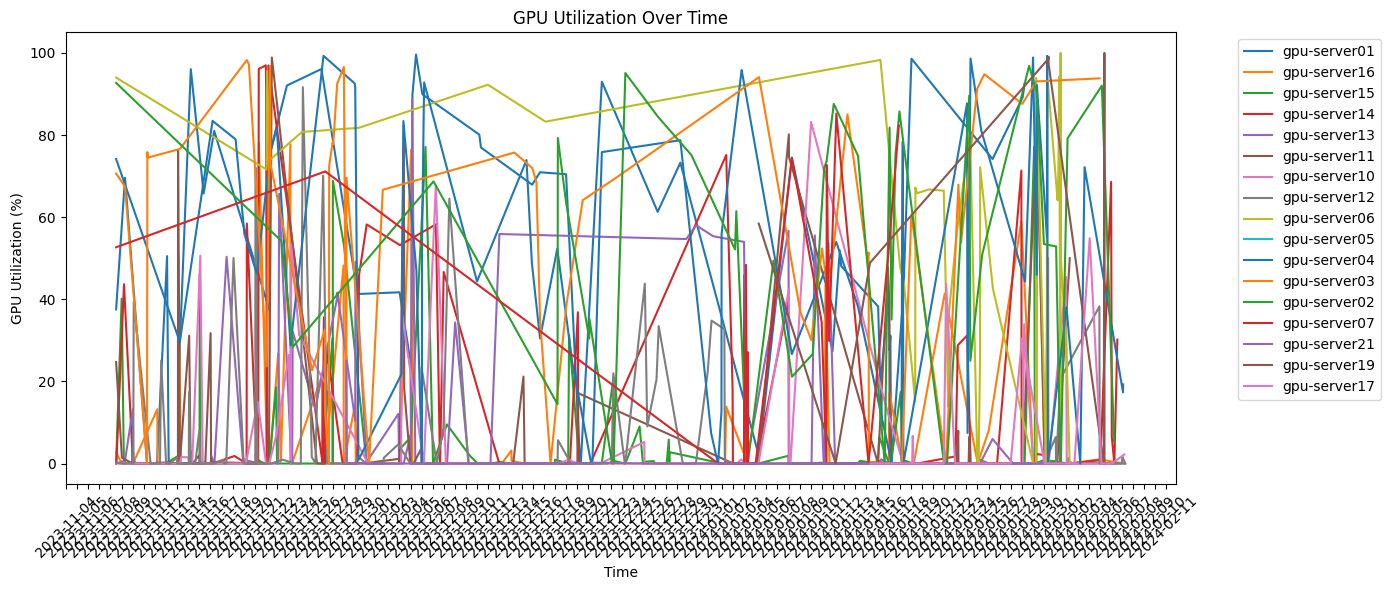

(count    2061.000000
 mean       21.456920
 std        33.255481
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%        44.038615
 max       100.000000
 Name: gpu_utilization, dtype: float64,
 count    2061.000000
 mean       74.807254
 std       205.242669
 min         0.250000
 25%         7.750000
 50%        24.000000
 75%        45.000000
 max      2186.750000
 Name: duration_hours, dtype: float64)

In [5]:
# Create a new column for task duration in hours
data['duration_hours'] = (data['finish'] - data['start']).dt.total_seconds() / 3600

# Basic statistics for GPU utilization and task duration
utilization_stats = data['gpu_utilization'].describe()
duration_stats = data['duration_hours'].describe()

# Plotting GPU utilization over time
plt.figure(figsize=(14, 6))

# Considering we might have multiple entries for the same GPU at different times,
# we will aggregate the data by start time and GPU, taking the mean utilization.
# This is a simplification and might not fully represent concurrent tasks.
aggregated_data = data.groupby(['start', 'node'])['gpu_utilization'].mean().reset_index()

# Ensure the data is sorted by start time for plotting
aggregated_data.sort_values('start', inplace=True)

# Plot each GPU as a separate line
for gpu in aggregated_data['node'].unique():
    gpu_data = aggregated_data[aggregated_data['node'] == gpu]
    plt.plot(gpu_data['start'], gpu_data['gpu_utilization'], marker='', linewidth=1.5, label=gpu)

plt.title('GPU Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('GPU Utilization (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.tight_layout()

plt.show()

utilization_stats, duration_stats

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   node             2061 non-null   object             
 1   gpu_number       2061 non-null   int64              
 2   GPU              2061 non-null   object             
 3   gpu_utilization  2061 non-null   float64            
 4   pod_name         2061 non-null   object             
 5   pod_type         2050 non-null   object             
 6   project          2061 non-null   object             
 7   namespace        2061 non-null   object             
 8   user_team        1965 non-null   object             
 9   start            2061 non-null   datetime64[ns, UTC]
 10  finish           2061 non-null   datetime64[ns, UTC]
 11  pod_type_color   2061 non-null   object             
 12  project_color    2061 non-null   object             
 13  time_diff        2

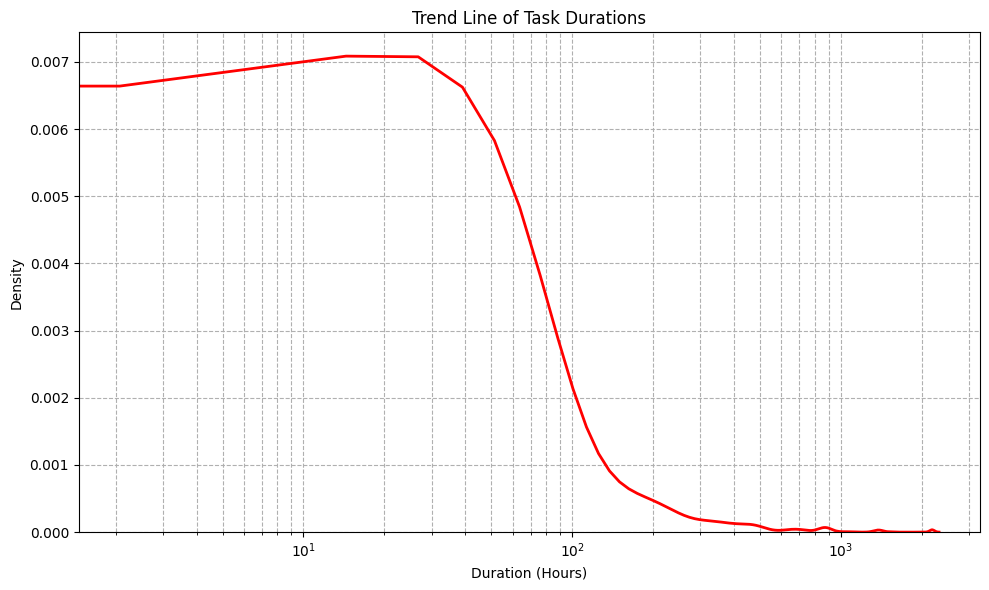

In [7]:
# Plotting only the KDE (Kernel Density Estimate) to show the trend line of task durations
plt.figure(figsize=(10, 6))
sns.kdeplot(data['duration_hours'], color='red', linewidth=2)
plt.title('Trend Line of Task Durations')
plt.xlabel('Duration (Hours)')
plt.ylabel('Density')
plt.xscale('log')  # Using a logarithmic scale due to wide range of durations
plt.grid(True, which="both", ls="--")
plt.tight_layout()

plt.show()



df = df.drop(['time_diff'], axis = 1)
df

df.to_csv('tp_gpu_workload_only_log.csv', index=None)

data['date'] = data['start'].dt.date  # Extracting date from start time

# Filtering data for 'gpu-server01' and idle periods (gpu_utilization == 0)
gpu_server01_idle_data = data[(data['node'] == 'gpu-server01') & (data['gpu_utilization'] == 0)]

# Group by date to calculate total idle time per day for 'gpu-server01'
daily_idle_time_gpu_server01 = gpu_server01_idle_data.groupby('date')['duration_hours'].sum().reset_index()


# Filtering out tasks with 0% GPU utilization to focus on idle periods
idle_data = data[data['gpu_utilization'] == 0]

# Group by date and node to calculate total idle time per day for each node
daily_idle_time_by_node = idle_data.groupby(['date', 'node'])['duration_hours'].sum().unstack(fill_value=0)

# Plotting separate line trend graphs for daily idle time of each node
nodes = daily_idle_time_by_node.columns

num_nodes = len(nodes)
cols = 4  # Number of columns in the grid
rows = np.ceil(num_nodes / cols).astype(int)  # Number of rows, ensuring all nodes are included

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(num_nodes, 4 * rows), constrained_layout=True)
fig.suptitle('Daily Idle Time Trends for Each Node', fontsize=16)

# Flatten axes array for easy indexing
axes_flat = axes.flatten()

for i, node in enumerate(nodes):
    sns.lineplot(ax=axes_flat[i], data=daily_idle_time_by_node[node].reset_index(), x='date', y=node, marker='o', linestyle='-', color='blue')
    axes_flat[i].set_title(f'{node}')
    axes_flat[i].set_xlabel('Date')
    axes_flat[i].set_ylabel('Idle Time (Hours)')
    axes_flat[i].tick_params(axis='x', rotation=45)
    axes_flat[i].grid(True)

# Hide unused subplots if the number of nodes is not a multiple of cols
for j in range(i + 1, rows * cols):
    axes_flat[j].set_visible(False)

plt.show()



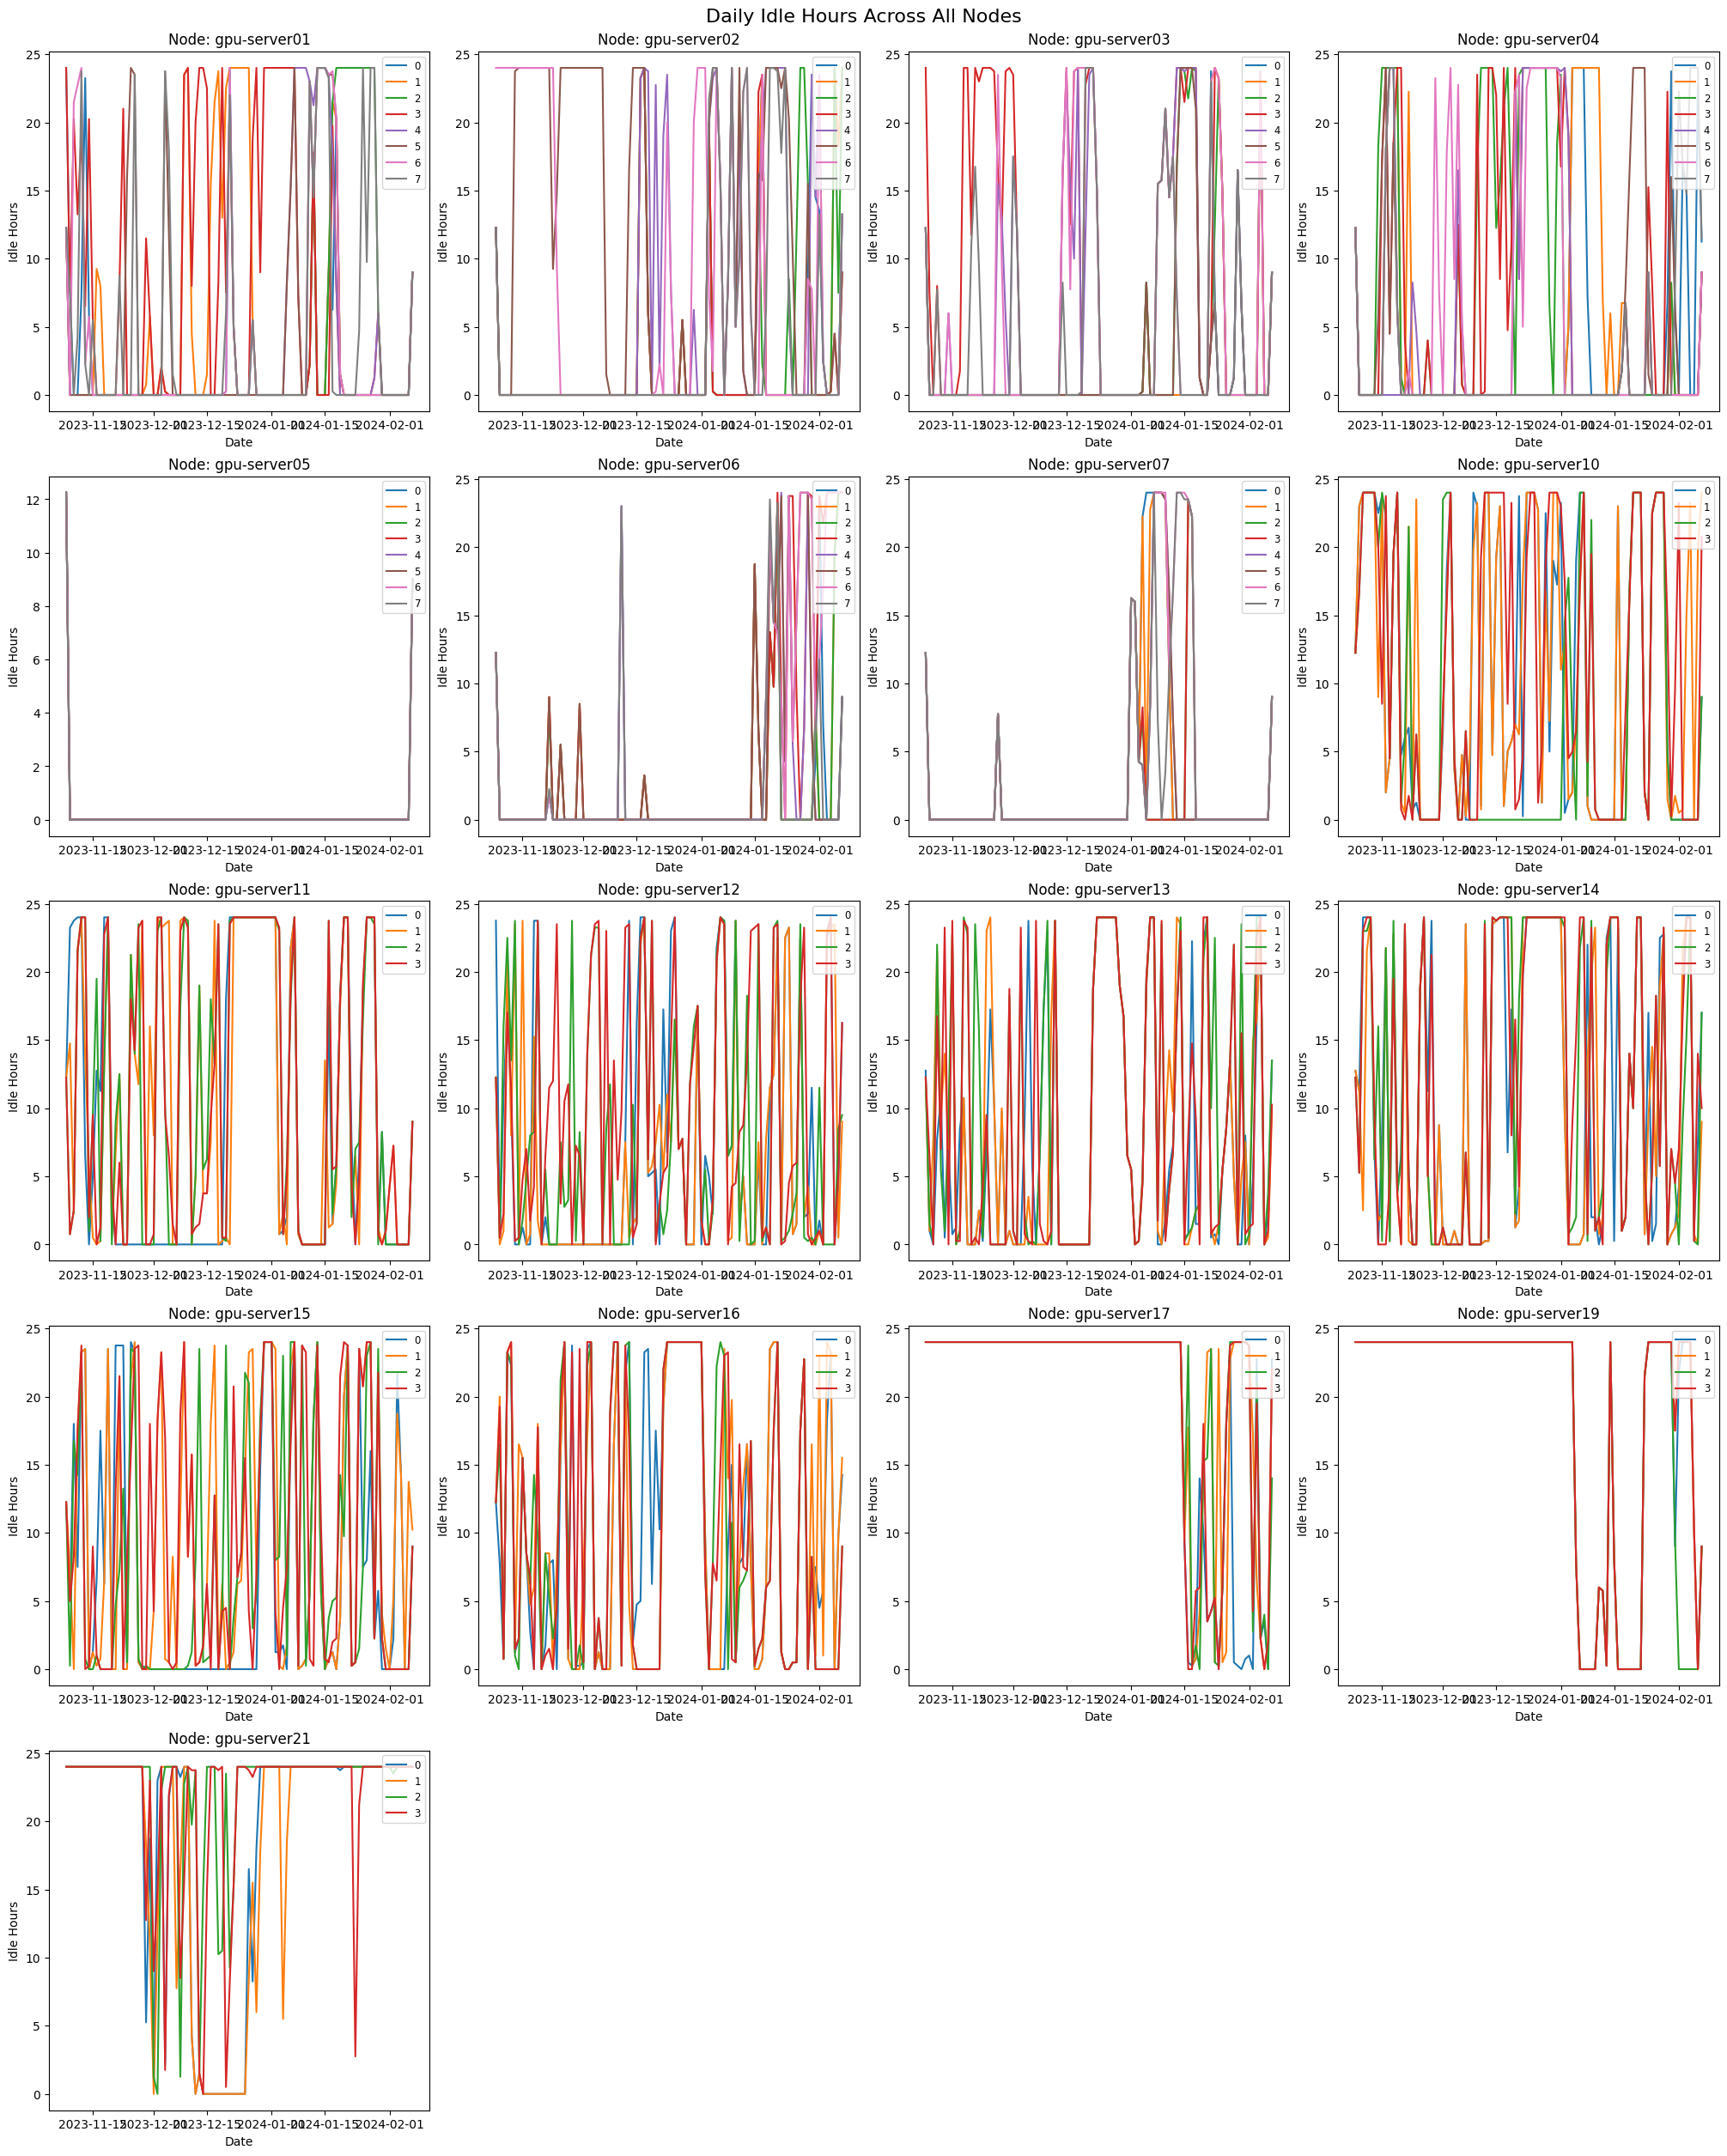

In [8]:
# 데이터 로드 및 시간대 정보 제거
data['start'] = pd.to_datetime(data['start']).dt.tz_localize(None)
data['finish'] = pd.to_datetime(data['finish']).dt.tz_localize(None)

# 모든 노드와 GPU의 조합 생성
all_nodes = data['node'].unique()
all_gpus = data['GPU'].unique()
date_range = pd.date_range(data['start'].min().date(), data['finish'].max().date(), freq='D')

# 일별 실행 시간을 계산하기 위한 데이터 프레임 초기화
df_combinations = pd.DataFrame([(date, '', gpu, 0) for date in date_range for gpu in all_gpus], columns=['date', 'node', 'GPU', 'execution_hours'])

# 일별 실행 시간 계산 함수
def calculate_execution_hours(row):
    applicable_rows = df_combinations[(df_combinations['GPU'] == row['GPU']) &
                                      (df_combinations['date'].dt.date >= row['start'].date()) & 
                                      (df_combinations['date'].dt.date <= row['finish'].date())]
    
    for index, applicable_row in applicable_rows.iterrows():
        start_of_day = pd.Timestamp(applicable_row['date'])
        end_of_day = start_of_day + pd.Timedelta(days=1)
        start_time = max(start_of_day, row['start'])
        end_time = min(end_of_day, row['finish'])
        
        # 날짜에 따른 실행 시간 계산
        execution_hours = (end_time - start_time).total_seconds() / 3600
        df_combinations.at[index, 'execution_hours'] = execution_hours

# 각 로우에 대해 함수 적용
data.apply(calculate_execution_hours, axis=1)

# 유휴 시간 계산
df_combinations['idle_hours'] = 24 - df_combinations['execution_hours']
df_combinations['node'] = df_combinations['GPU'].apply(lambda x: x.split(':')[0])


# 시각화
cols = 4  # 한 줄에 표시할 그래프 수
rows = int(np.ceil(len(all_nodes) / cols))  # 필요한 줄 수 계산

fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 5), constrained_layout=True)
fig.suptitle('Daily Idle Hours Across All Nodes', fontsize=16)

for i, node in enumerate(all_nodes):
    ax = axs[i // cols, i % cols]
    node_gpus = df_combinations[df_combinations['GPU'].str.contains(node)]
    for gpu in node_gpus['GPU'].unique():
        gpu_data = node_gpus[node_gpus['GPU'] == gpu]
        ax.plot(gpu_data['date'], gpu_data['idle_hours'], label=gpu.split(':')[1])

    ax.set_title(f'Node: {node}')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.set_xlabel('Date')
    ax.set_ylabel('Idle Hours')
    ax.legend(loc='upper right', fontsize='small')

# 나머지 빈 subplot 숨기기
for j in range(i + 1, rows * cols):
    fig.delaxes(axs.flatten()[j])

plt.show()


In [9]:
agg_df = df_combinations.groupby(['node', 'date']).agg({
    'execution_hours': 'sum', 'idle_hours': 'sum'
}).reset_index()

In [10]:
# 8개 GPU 가진 노드만 출력
#columns_to_exclude = ['gpu-server10', 'gpu-server11', 'gpu-server12', 'gpu-server13', 'gpu-server14', 'gpu-server15', 'gpu-server16', 'gpu-server17', 'gpu-server19', 'gpu-server21']
columns_to_exclude = ['gpu-server17', 'gpu-server19', 'gpu-server21']

filtered_df = agg_df[~agg_df['node'].isin(columns_to_exclude)]
filtered_df

,node,date,execution_hours,idle_hours
0,gpu-server01,2023-11-08,70.50,121.50
1,gpu-server01,2023-11-09,169.50,22.50
2,gpu-server01,2023-11-10,150.25,41.75
3,gpu-server01,2023-11-11,151.75,40.25
4,gpu-server01,2023-11-12,117.75,74.25
...,...,...,...,...
1283,gpu-server16,2024-02-03,53.75,42.25
1284,gpu-server16,2024-02-04,49.50,46.50
1285,gpu-server16,2024-02-05,96.00,0.00
1286,gpu-server16,2024-02-06,76.50,19.50


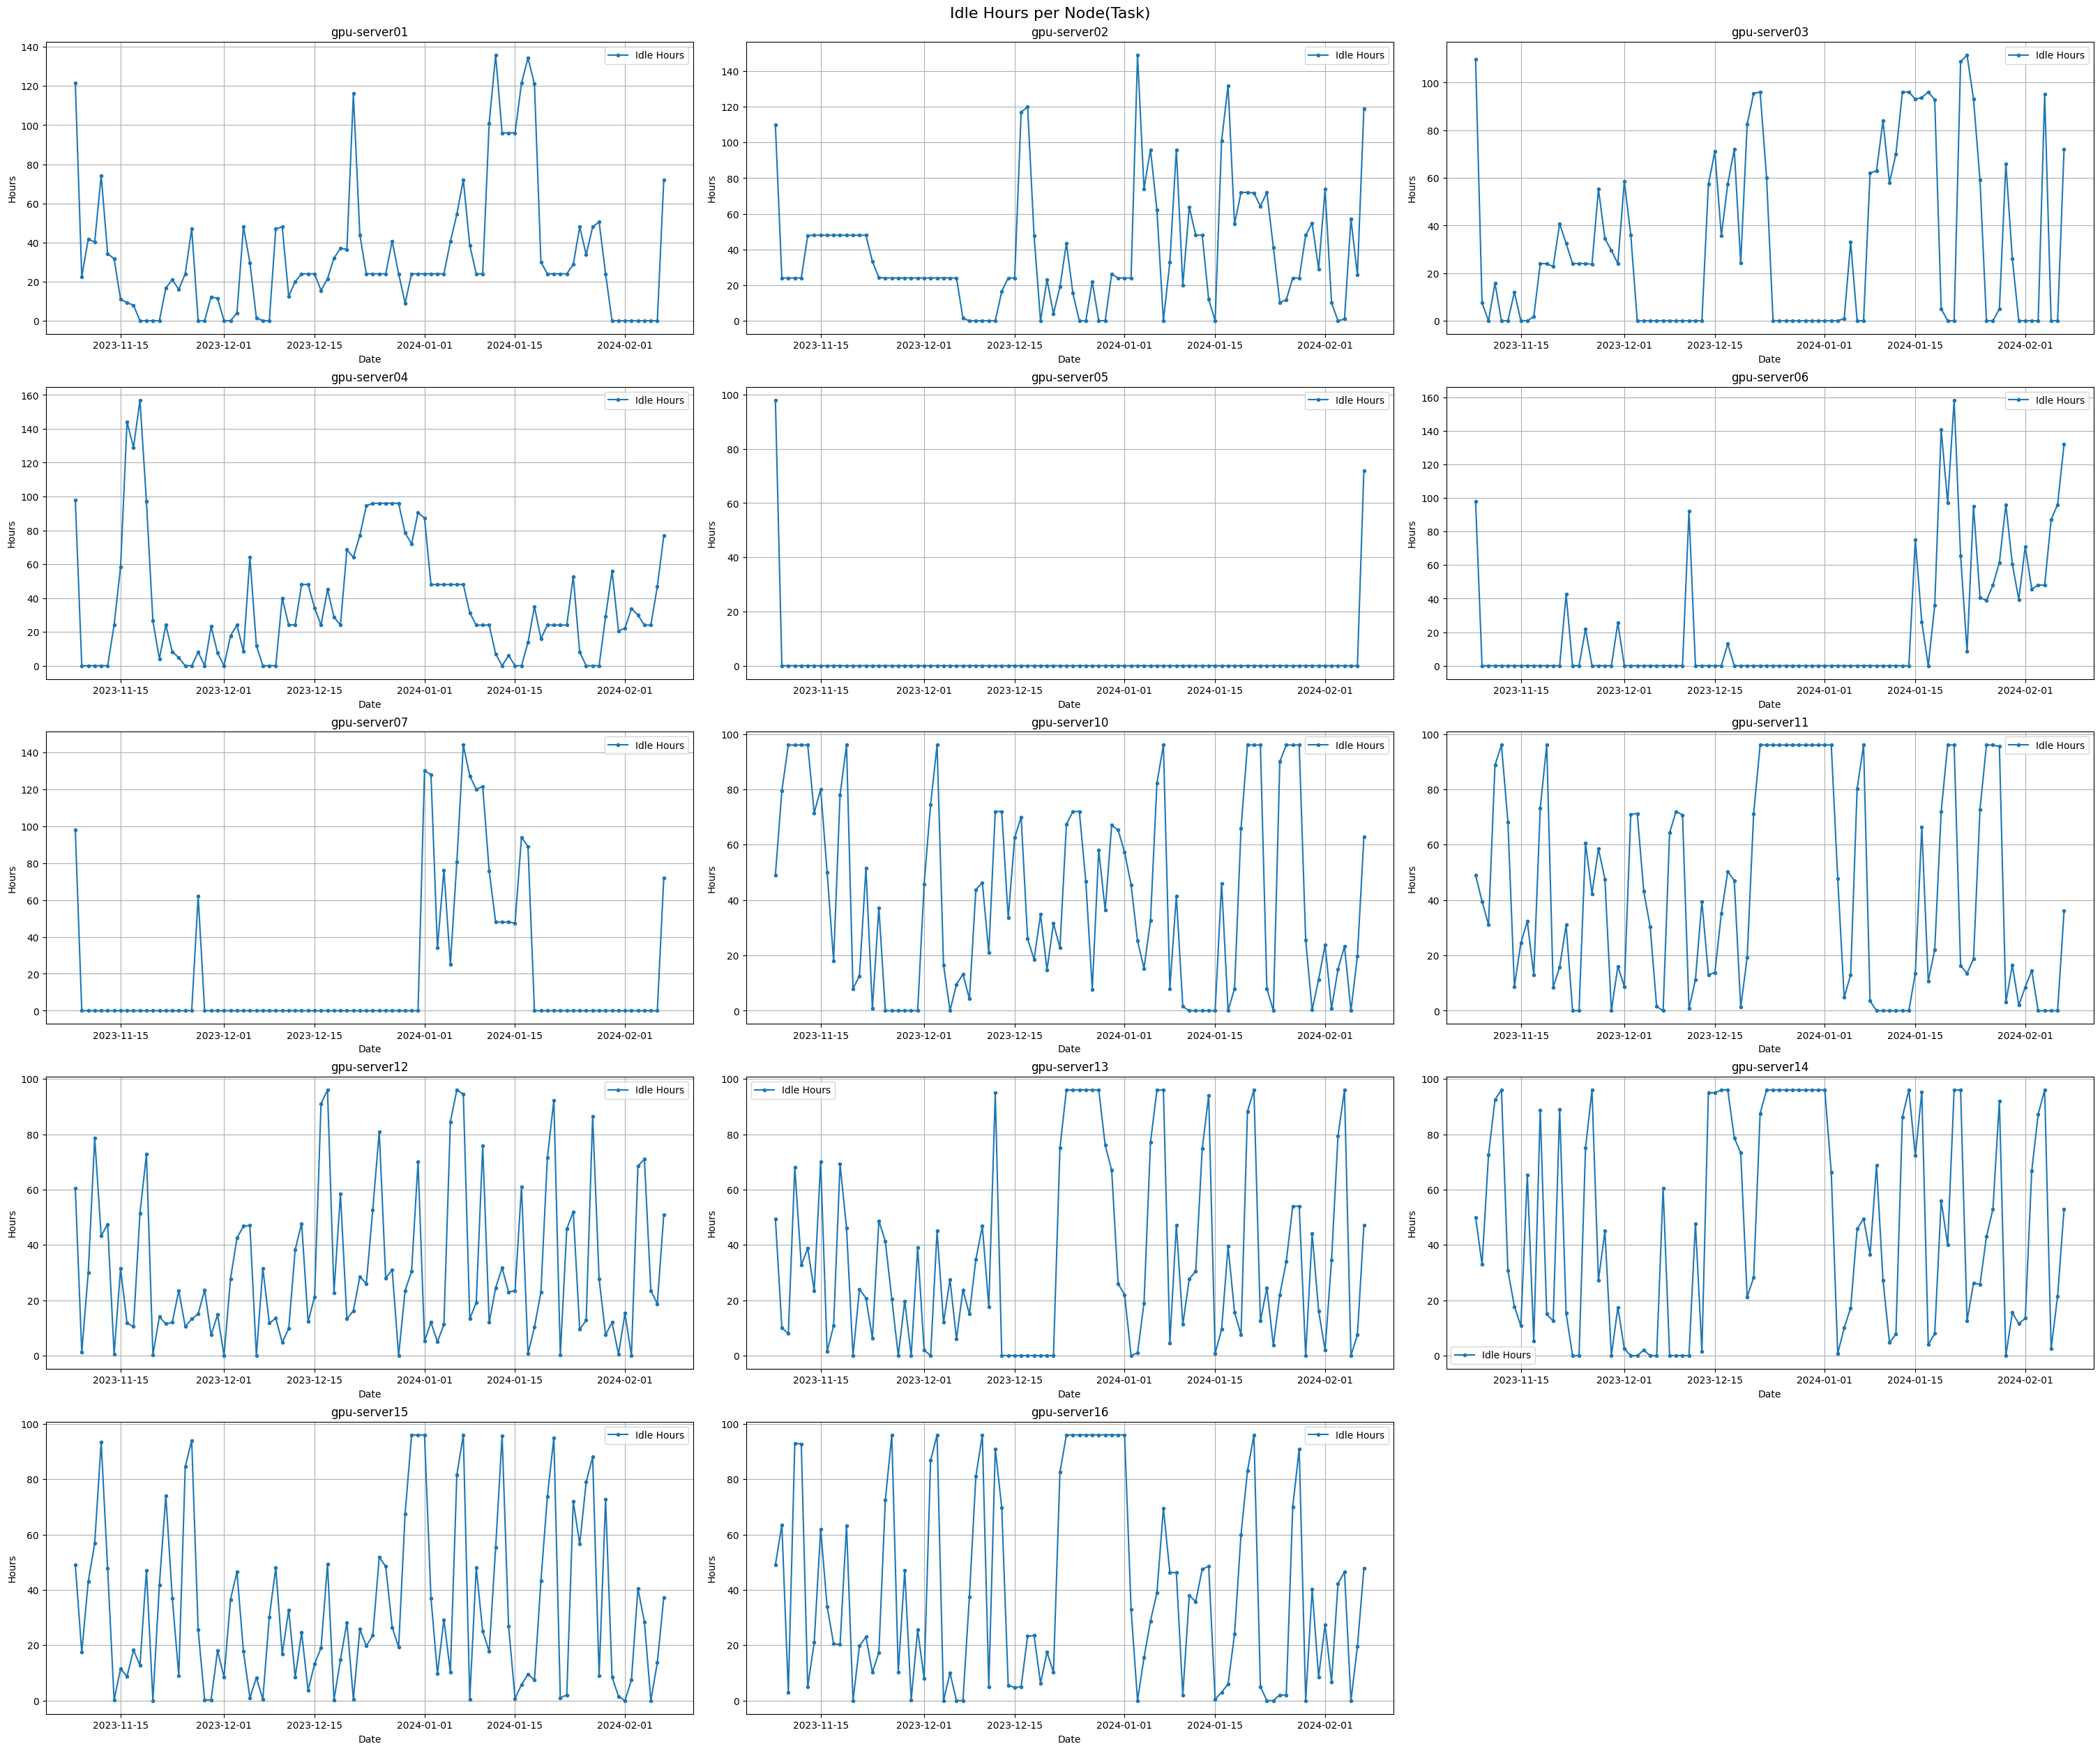

In [11]:
# 노드별로 데이터 분리 (이 예제에서는 하나의 노드만 있지만, 여러 노드가 있을 경우를 고려하여 작성)
nodes = filtered_df['node'].unique()

# 한 줄에 4개의 그래프를 그리기 위한 subplot 설정
cols = 3
rows = (len(nodes) + cols - 1) // cols  # 필요한 행의 수 계산

fig, axs = plt.subplots(rows, cols, figsize=(30, 5 * rows), constrained_layout=True)
fig.suptitle('Idle Hours per Node(Task)', fontsize=16)

# 각 노드별로 그래프 그리기
for i, node in enumerate(nodes):
    ax = axs[i // cols, i % cols] if rows > 1 or cols > 1 else axs
    node_data = filtered_df[filtered_df['node'] == node]
    ax.plot(node_data['date'], node_data['idle_hours'], label='Idle Hours', marker='.')
    
    ax.set_title(node)
    ax.set_xlabel('Date')
    ax.set_ylabel('Hours')
    ax.legend()
    ax.grid(True)

# 나머지 빈 subplot 숨기기
if rows > 1 or cols > 1:
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs.flatten()[j])

plt.show()

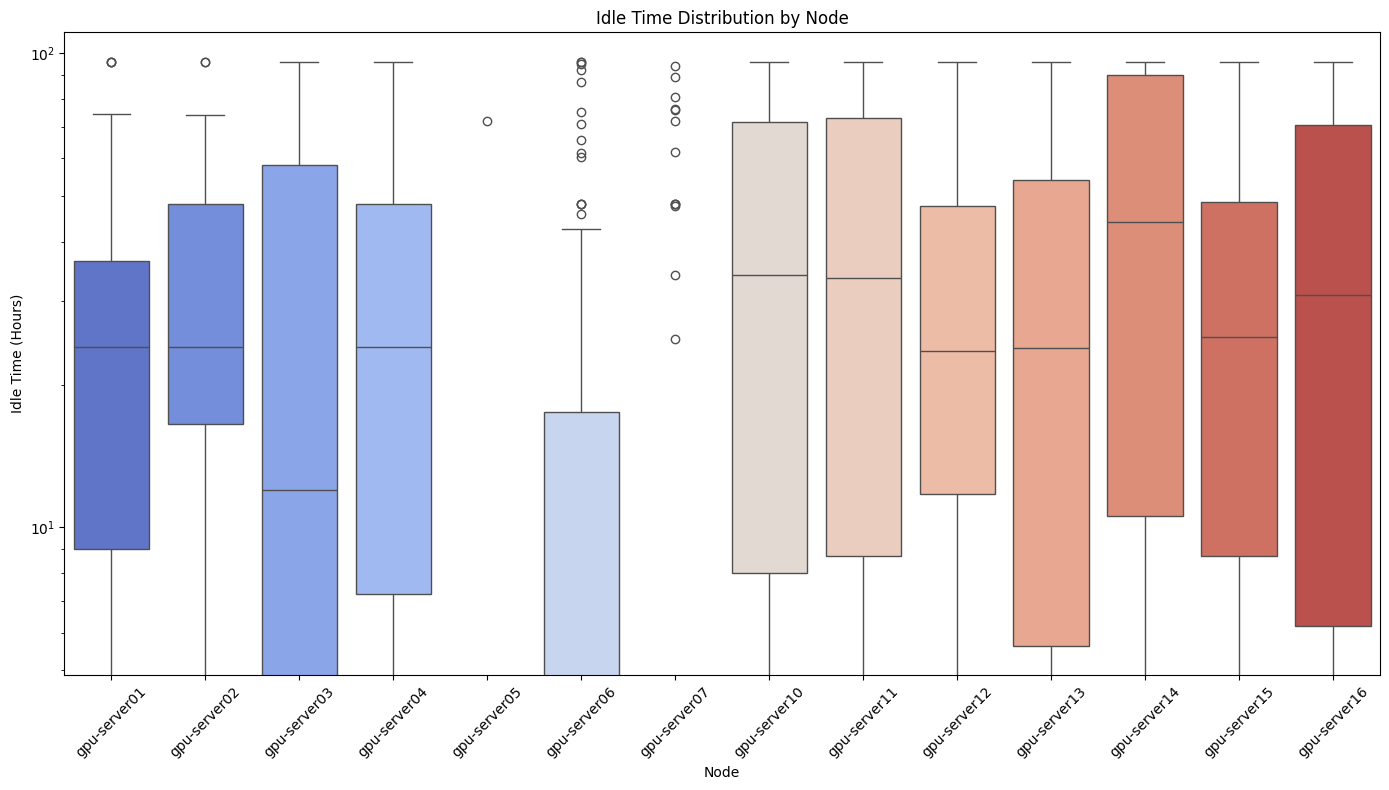

In [12]:
# Calculate the 95th percentile of idle time across all nodes for each day to remove outliers
percentile_95 = filtered_df['idle_hours'].quantile(0.95)

# Filtering out data points above the 95th percentile
filtered_idle_data = filtered_df[filtered_df['idle_hours'] <= percentile_95]

# 박스 플롯을 사용하여 각 노드별 일일 유휴 시간의 분포를 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='node', y='idle_hours', data=filtered_idle_data, hue='node',palette="coolwarm")
plt.title('Idle Time Distribution by Node')
plt.xlabel('Node')
plt.ylabel('Idle Time (Hours)')
plt.xticks(rotation=45)
plt.yscale('log')  # Y 축을 로그 스케일로 설정하여 분포의 세부사항을 더 잘 보여줌
plt.tight_layout()

plt.show()

In [13]:
filtered_df = agg_df[agg_df['node'].isin(columns_to_exclude)]
filtered_df

,node,date,execution_hours,idle_hours
1288,gpu-server17,2023-11-08,0.0,96.0
1289,gpu-server17,2023-11-09,0.0,96.0
1290,gpu-server17,2023-11-10,0.0,96.0
1291,gpu-server17,2023-11-11,0.0,96.0
1292,gpu-server17,2023-11-12,0.0,96.0
...,...,...,...,...
1559,gpu-server21,2024-02-03,0.0,96.0
1560,gpu-server21,2024-02-04,0.0,96.0
1561,gpu-server21,2024-02-05,0.0,96.0
1562,gpu-server21,2024-02-06,0.0,96.0


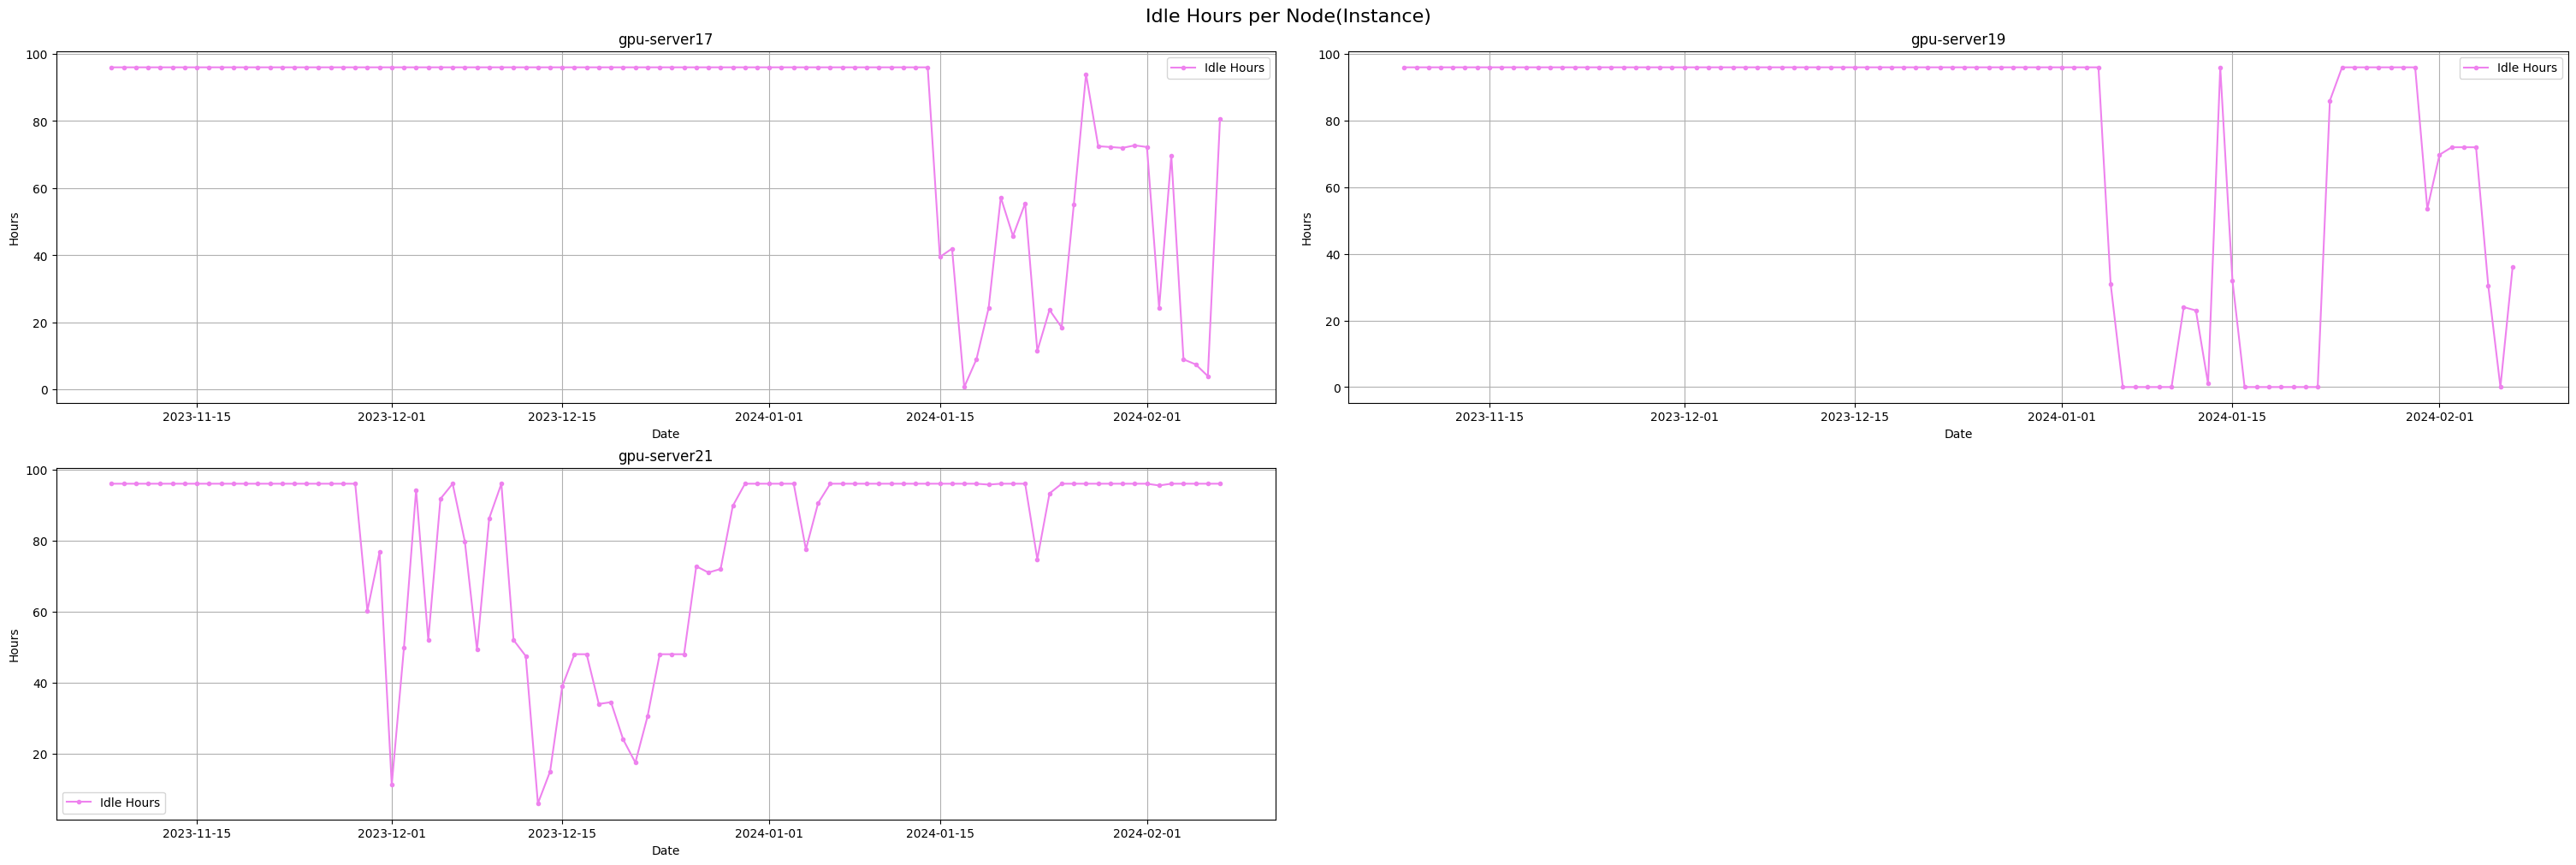

In [14]:
# 노드별로 데이터 분리 (이 예제에서는 하나의 노드만 있지만, 여러 노드가 있을 경우를 고려하여 작성)
nodes = filtered_df['node'].unique()

# 한 줄에 4개의 그래프를 그리기 위한 subplot 설정
cols = 2
rows = (len(nodes) + cols - 1) // cols  # 필요한 행의 수 계산

fig, axs = plt.subplots(rows, cols, figsize=(30, 5 * rows), constrained_layout=True)
fig.suptitle('Idle Hours per Node(Instance)', fontsize=16)

# 각 노드별로 그래프 그리기
for i, node in enumerate(nodes):
    ax = axs[i // cols, i % cols] if rows > 1 or cols > 1 else axs
    node_data = filtered_df[filtered_df['node'] == node]
    ax.plot(node_data['date'], node_data['idle_hours'], label='Idle Hours', marker='.', color='violet')
    
    ax.set_title(node)
    ax.set_xlabel('Date')
    ax.set_ylabel('Hours')
    ax.legend()
    ax.grid(True)

# 나머지 빈 subplot 숨기기
if rows > 1 or cols > 1:
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs.flatten()[j])

plt.show()

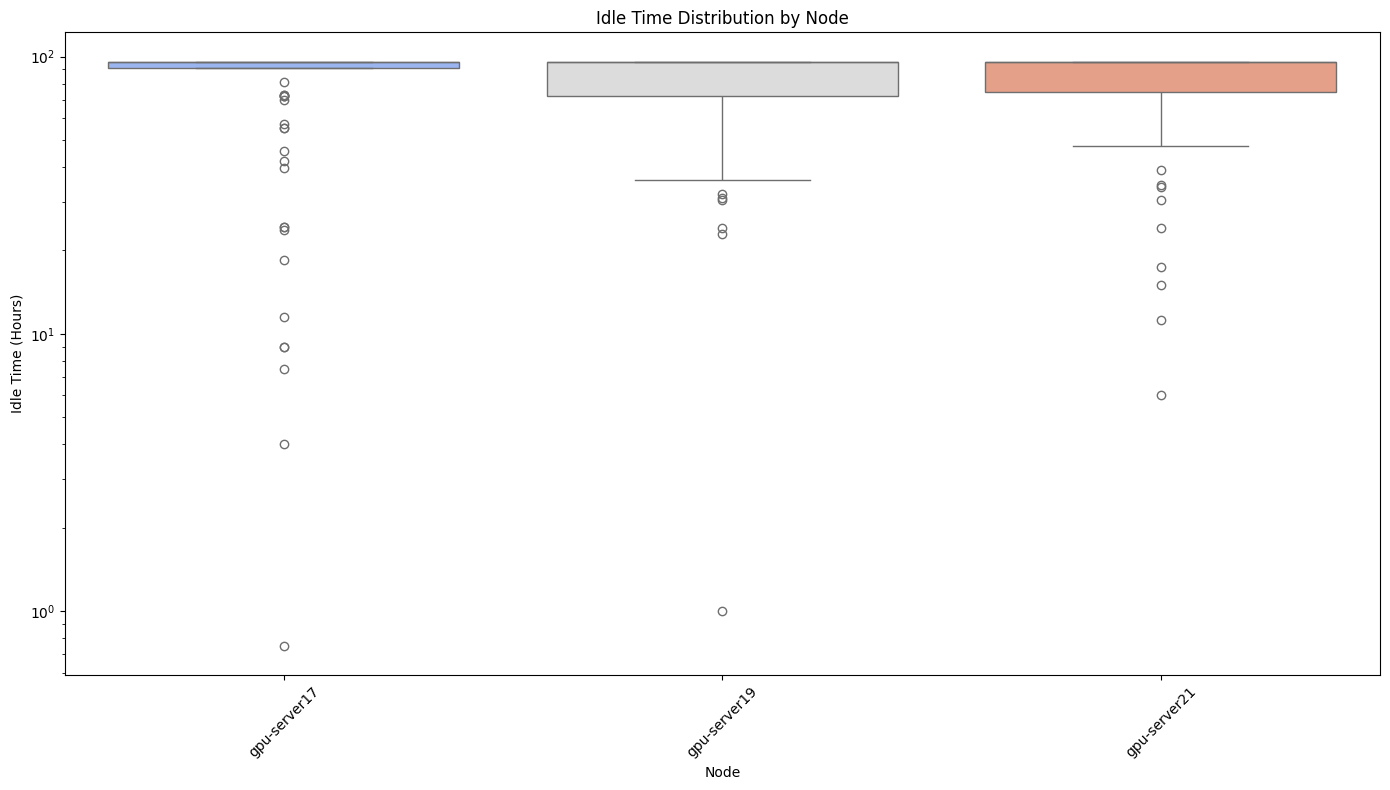

In [15]:
# Calculate the 95th percentile of idle time across all nodes for each day to remove outliers
percentile_95 = filtered_df['idle_hours'].quantile(0.95)

# Filtering out data points above the 95th percentile
filtered_idle_data = filtered_df[filtered_df['idle_hours'] <= percentile_95]

# 박스 플롯을 사용하여 각 노드별 일일 유휴 시간의 분포를 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='node', y='idle_hours', data=filtered_idle_data, hue='node',palette="coolwarm")
plt.title('Idle Time Distribution by Node')
plt.xlabel('Node')
plt.ylabel('Idle Time (Hours)')
plt.xticks(rotation=45)
plt.yscale('log')  # Y 축을 로그 스케일로 설정하여 분포의 세부사항을 더 잘 보여줌
plt.tight_layout()

plt.show()

In [16]:
log

,node,gpu_number,GPU,gpu_utilization,pod_name,pod_type,project,namespace,user_team,start,finish,pod_type_color,project_color
0,gpu-server01,0,gpu-server01:0,68.499391,violet-run-pipeline-gpu-kb27t-3379495359,task,PROJECT_17,ns-16904374776309414,NaN,2023-11-09 16:30:00+09:00,2023-11-13 01:45:00+09:00,red,"(0.29545293465748007, 0.0, 1.0, 1.0)"
1,gpu-server01,0,gpu-server01:0,0.000000,violet-run-pipeline-gpu-ff44j-3079852243,task,PROJECT_1,ns-16904458533318198,NaN,2023-11-13 14:45:00+09:00,2023-11-13 15:30:00+09:00,red,"(1.0, 0.0, 0.0, 1.0)"
2,gpu-server01,0,gpu-server01:0,34.499490,violet-run-pipeline-gpu-xnpsz-830121636,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-14 14:45:00+09:00,2023-12-21 08:45:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
3,gpu-server01,0,gpu-server01:0,93.161125,violet-run-pipeline-gpu-fftp4-1617571953,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-22 14:00:00+09:00,2023-12-27 14:15:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
4,gpu-server01,0,gpu-server01:0,71.150017,violet-run-pipeline-gpu-9tnd8-1865815998,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-12-27 14:30:00+09:00,2024-01-12 06:45:00+09:00,red,"(0.0, 0.7784117755708665, 1.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,gpu-server21,3,gpu-server21:3,0.352398,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 09:30:00+09:00,2023-12-21 09:30:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2057,gpu-server21,3,gpu-server21:3,0.009993,instance-2242-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-21 17:15:00+09:00,2023-12-22 17:45:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2058,gpu-server21,3,gpu-server21:3,0.000000,instance-2304-0,instance,PROJECT_14,ns-1693886715473508,TEAM_11,2023-12-26 14:45:00+09:00,2023-12-26 15:00:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"
2059,gpu-server21,3,gpu-server21:3,0.000000,instance-2312-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-27 16:30:00+09:00,2023-12-27 17:15:00+09:00,blue,"(0.0, 0.5099455980137799, 1.0, 1.0)"


In [17]:
#task_log = log
print("Total Count: " + str(len(log)))
task_log = log[log['pod_type'].isin({'task'})]
insta_log = log[log['pod_type'].isin({'instance'})]
print("Only task: " + str(len(task_log)))
print("\nUnique Count\n")
print('pod_name: ' + str(len(task_log['pod_name'].unique())))
print('namespace: ' + str(len(task_log['namespace'].unique())))
print('start: ' + str(len(task_log['start'].unique())))

Total Count: 2061
Only task: 808

Unique Count

pod_name: 368
namespace: 11
start: 335


In [18]:
task_group = pd.DataFrame(task_log)
task_group['count'] = task_group.groupby('pod_name')['pod_name'].transform('count')
task_group = task_group.sort_values(by='start', ascending=True)


task_group['start'] = pd.to_datetime(data['start'], utc=True)
task_group['finish'] = pd.to_datetime(data['finish'], utc=True)
task_group['time_diff'] = task_group['finish'] - task_group['start']


insta_log = pd.DataFrame(insta_log)

insta_log['start'] = pd.to_datetime(data['start'], utc=True)
insta_log['finish'] = pd.to_datetime(data['finish'], utc=True)
insta_log['time_diff'] = insta_log['finish'] - insta_log['start']
insta_log['count'] = 1

task_group = task_group.drop(columns=['node','gpu_number','GPU','gpu_utilization','project_color', 'pod_type_color'])
insta_log = insta_log.drop(columns=['node','gpu_number','GPU','gpu_utilization','project_color', 'pod_type_color'])

task_group

,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff
151,violet-run-pipeline-gpu-9fg4g-4198045470,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-08 12:15:00+00:00,2023-12-16 00:45:00+00:00,4,37 days 12:30:00
465,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 02:15:00+00:00,8,13 days 14:00:00
486,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
499,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 08:00:00+00:00,8,13 days 19:45:00
518,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
...,...,...,...,...,...,...,...,...,...
186,violet-run-pipeline-gpu-9bdds-2661085165,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-05 04:30:00+00:00,2024-02-07 15:00:00+00:00,2,2 days 10:30:00
143,violet-run-pipeline-gpu-vd7wk-4198087334,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-06 07:00:00+00:00,2024-02-06 23:30:00+00:00,1,0 days 16:30:00
134,violet-run-pipeline-gpu-9w7hx-1761467166,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-06 07:00:00+00:00,2024-02-06 12:45:00+00:00,2,0 days 05:45:00
326,violet-run-pipeline-gpu-9w7hx-1761467166,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-07 02:15:00+00:00,2024-02-07 15:00:00+00:00,2,0 days 12:45:00


In [19]:
task_total = pd.concat([task_group, insta_log], ignore_index=True)
task_total

,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff
0,violet-run-pipeline-gpu-9fg4g-4198045470,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-08 12:15:00+00:00,2023-12-16 00:45:00+00:00,4,37 days 12:30:00
1,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 02:15:00+00:00,8,13 days 14:00:00
2,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
3,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 08:00:00+00:00,8,13 days 19:45:00
4,violet-run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
...,...,...,...,...,...,...,...,...,...
2045,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 00:30:00+00:00,2023-12-21 00:30:00+00:00,1,1 days 00:00:00
2046,instance-2242-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-21 08:15:00+00:00,2023-12-22 08:45:00+00:00,1,1 days 00:30:00
2047,instance-2304-0,instance,PROJECT_14,ns-1693886715473508,TEAM_11,2023-12-26 05:45:00+00:00,2023-12-26 06:00:00+00:00,1,0 days 00:15:00
2048,instance-2312-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-27 07:30:00+00:00,2023-12-27 08:15:00+00:00,1,0 days 00:45:00


In [20]:
task_total['pod_name'] = task_total['pod_name'].replace('violet-', '', regex=True)
task_total

,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff
0,run-pipeline-gpu-9fg4g-4198045470,task,PROJECT_13,ns-16904409679649498,TEAM_1,2023-11-08 12:15:00+00:00,2023-12-16 00:45:00+00:00,4,37 days 12:30:00
1,run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 02:15:00+00:00,8,13 days 14:00:00
2,run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
3,run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 08:00:00+00:00,8,13 days 19:45:00
4,run-pipeline-gpu-8g5pb-2879794351,task,PROJECT_13,ns-16904409679649498,NaN,2023-11-08 12:15:00+00:00,2023-11-22 01:30:00+00:00,8,13 days 13:15:00
...,...,...,...,...,...,...,...,...,...
2045,instance-2142-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-20 00:30:00+00:00,2023-12-21 00:30:00+00:00,1,1 days 00:00:00
2046,instance-2242-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-21 08:15:00+00:00,2023-12-22 08:45:00+00:00,1,1 days 00:30:00
2047,instance-2304-0,instance,PROJECT_14,ns-1693886715473508,TEAM_11,2023-12-26 05:45:00+00:00,2023-12-26 06:00:00+00:00,1,0 days 00:15:00
2048,instance-2312-0,instance,PROJECT_14,ns-1693886715473508,TEAM_5,2023-12-27 07:30:00+00:00,2023-12-27 08:15:00+00:00,1,0 days 00:45:00


In [21]:
task_total.to_csv('job_flow.csv', index=False)